<a href="https://colab.research.google.com/github/rdsiese/MANDES/blob/main/1_Monte_Carlo_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Monte Carlo Simulation

### The Law of Large Numbers

Assume that the probability of a drug obtaining Phase-IV approval by the FDA is p=0.65. The cash flows generated by the drug should be modeled in such a way that it is approved 65% of the times.

Consider $n$ random variables $𝑋_1, 𝑋_2,…, 𝑋_𝑛$ that are independent and distributed as a Yes−No (0.65). Each variable will represent the FDA approval in one scenario.

A Yes-No (p) distribution is the same as as Binomial (1, p). We have that $\mu = 0.65$ and $\sigma = \sqrt{1p(1-p)}=0.4770$.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.random.binomial(1,0.65,15)

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

We generate a sample of size 10, store the sample values with the name **coin**, and compute the sample average sequentially.

In [ ]:
n = 10
samplemean = np.zeros(n+1)
coin = np.random.binomial(1,0.65,n)

for i in range(0,n):
    samplemean[i+1] = samplemean[i]*i/(i+1) + coin[i]/(i+1)

print(f'coin: \t\t{coin} \nsample mean: \t{samplemean[1:].round(2)}')

coin: 		[1 1 1 0 1 0 1 1 1 1] 
sample mean: 	[1.   1.   1.   0.75 0.8  0.67 0.71 0.75 0.78 0.8 ]


Note that the sample mean is the last value of the sequential means (the last number in the array above). It's around 0.65, but not that close...

We now try larger samples and plot the results. Use different values of m (100, 500, 1000, 10000).

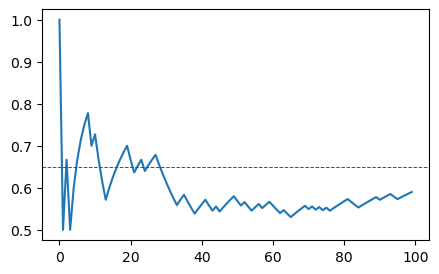

In [ ]:
n = 100
samplemean = np.zeros(n+1)
coin = np.random.binomial(1,0.65,n)

for i in range(0,n):
    samplemean[i+1] = samplemean[i]*i/(i+1) + coin[i]/(i+1)

plt.figure(figsize=(5, 3))
plt.plot(samplemean[1:])
plt.axhline(y=0.65, color='red', linestyle='--', linewidth=0.7, label='0.65');

### The Central Limit Theorem

We have seen what happens with one sample of different sizes. Now let's look at several samples.

We start with 10 samples, each one of size 100. We will then generate more samples of larger size.

Let's look at how the sample mean is distributed if we take many samples. Recall that the sample mean is the last value of the sequential means (the last value of each *path*).


95% confidence interval: (0.5546, 0.7454)


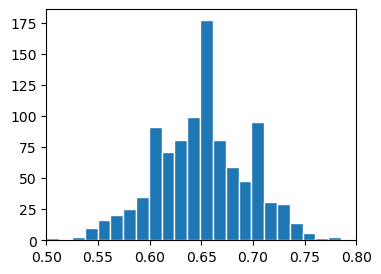

In [ ]:
n = 100        # sample size
m = 1000       # number of samples

def F_samplemean(s):
    F = np.random.binomial(1,0.65,s)
    return np.mean(F)

sim = np.zeros(m)

for i in range(0,m):
    sim[i] = F_samplemean(n)

plt.figure(figsize=(4, 3))
plt.hist(sim, bins=25, edgecolor='white')
plt.xlim(left=0.5, right=0.8);

stdv = np.sqrt(1*0.65*(1-0.65))
lower = 0.65 - 2*stdv/np.sqrt(n)
upper = 0.65 + 2*stdv/np.sqrt(n)

print(f'\n95% confidence interval: ({lower.round(4)}, {upper.round(4)})')

Check what happens as we increase the number of samples (1,000, 10,000, 100,000). How about if the samples are 10 or just 1?

Another way to look at this is by looking at the 95% confidence interval of the sample mean.

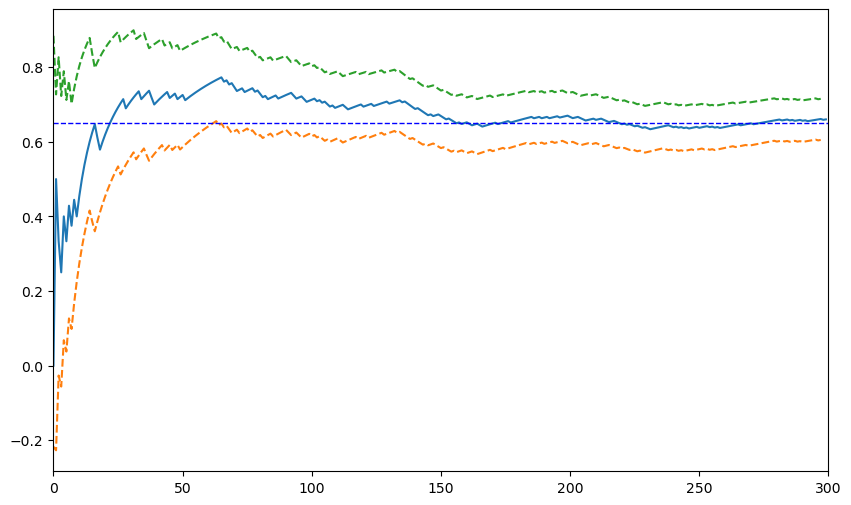

In [ ]:
n=300
stdv = np.sqrt(1*0.65*(1-0.65))

samplemean = np.zeros(n+1)
supp = np.zeros(n+1)
inff = np.zeros(n+1)

coin = np.random.binomial(1,0.65,n)
for i in range(0,n):
    samplemean[i+1] = samplemean[i]*i/(i+1) + coin[i]/(i+1)
    inff[i+1] = samplemean[i+1] - 2*stdv/np.sqrt(i+1)
    supp[i+1] = samplemean[i+1] + 2*stdv/np.sqrt(i+1)

plt.figure(figsize=(10, 6))
plt.plot(samplemean[1:])
plt.plot(inff[3:], linestyle='--')
plt.plot(supp[3:], linestyle='--')
plt.xlim(left=0, right=n)
plt.axhline(y=0.65, color='blue', linestyle='--', linewidth=1, label='0.65');